# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [3]:
cities

['rumoi',
 'zhigalovo',
 'hamilton',
 'hithadhoo',
 'lampasas',
 'maxixe',
 'puerto ayora',
 'lerwick',
 'ribeira grande',
 'invercargill',
 'vilyuchinsk',
 'prince rupert',
 'bethel',
 'port-aux-francais',
 'luau',
 'polyarnyy',
 'ushuaia',
 'woolgoolga',
 'nova sintra',
 'baependi',
 'chhor',
 'tura',
 'midvagur',
 'port augusta',
 'klyuchi',
 'luanda',
 'grytviken',
 'cabo san lucas',
 'puerto natales',
 'xique xique',
 'turkestan',
 'tsiombe',
 'ghat',
 'yellowknife',
 'cidreira',
 'katsuura',
 'waitangi',
 'port alfred',
 'bardai',
 'avarua',
 'vila velha',
 'sola',
 'ilulissat',
 'bilibino',
 'edinburgh of the seven seas',
 'flin flon',
 'gulf shores',
 'greymouth',
 'aral',
 'blackmans bay',
 'lompoc',
 'ascension',
 'tamanrasset',
 'constantia',
 'port mathurin',
 'sharypovo',
 'krasnohrad',
 'papatowai',
 'kirakira',
 'tolanaro',
 'papanasam',
 'bredasdorp',
 'hadibu',
 'margaret river',
 'adamstown',
 'porto novo',
 'thompson',
 'berdyansk',
 'khandyga',
 'booue',
 'keflavik'

In [4]:
#city_test = cities[0:10]
#city_test

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
from pprint import pprint

url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key
units= "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:


    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Convert city_unix_date to day
        # city_date = pd.to_datetime(city_unix_date, unit = 'M')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rumoi
Processing Record 2 of Set 1 | zhigalovo
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | lampasas
Processing Record 6 of Set 1 | maxixe
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | prince rupert
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | luau
Processing Record 16 of Set 1 | polyarnyy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | woolgoolga
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | baependi
Processing Record 21 of Set 1 | chhor
Processing Record 22 of Set 1 | tura
Processing Record 23 of Set 

Processing Record 40 of Set 4 | ryotsu-minato
Processing Record 41 of Set 4 | aruja
Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | kapuskasing
Processing Record 44 of Set 4 | kissidougou
Processing Record 45 of Set 4 | acarau
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | itoman
Processing Record 48 of Set 4 | ma'rib
Processing Record 49 of Set 4 | taulaga
Processing Record 0 of Set 5 | wildwood
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | ulsteinvik
Processing Record 3 of Set 5 | menaka
Processing Record 4 of Set 5 | mahanoro
Processing Record 5 of Set 5 | la'ie
Processing Record 6 of Set 5 | skive
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | marka
Processing Record 9 of Set 5 | ukholovo
Processing Record 10 of Set 5 | east london
Processing Record 11 of Set 5 | ola
Processing Record 12 of Set 5 | sarmiento
Processing Record 13 of Set 5 | lazaro cardenas
Processing Record 14 of Set 5 

Processing Record 33 of Set 8 | timimoun
Processing Record 34 of Set 8 | pacific grove
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | broken hill
Processing Record 38 of Set 8 | maues
Processing Record 39 of Set 8 | shyroke
Processing Record 40 of Set 8 | tindouf
Processing Record 41 of Set 8 | guarapari
Processing Record 42 of Set 8 | anzio
Processing Record 43 of Set 8 | yicheng
Processing Record 44 of Set 8 | inekar
City not found. Skipping...
Processing Record 45 of Set 8 | muravlenko
Processing Record 46 of Set 8 | abu zabad
Processing Record 47 of Set 8 | likiep
Processing Record 48 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 49 of Set 8 | al qubbah
Processing Record 0 of Set 9 | pinheiro
Processing Record 1 of Set 9 | san angelo
Processing Record 2 of Set 9 | brookings
Processing Record 3 of Set 9 | vizinga
Processing Record 4 of Set 9 | cat ba
City not found. Skipping...
Processing Record 5

Processing Record 18 of Set 12 | ciudad guadalupe victoria
Processing Record 19 of Set 12 | vilyuysk
Processing Record 20 of Set 12 | nakhon thai
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | bani walid
Processing Record 23 of Set 12 | cambridge
Processing Record 24 of Set 12 | anar darah
Processing Record 25 of Set 12 | palangkaraya
Processing Record 26 of Set 12 | betio village
Processing Record 27 of Set 12 | al bayda'
Processing Record 28 of Set 12 | port saint john's
Processing Record 29 of Set 12 | bowen
Processing Record 30 of Set 12 | lydenburg
Processing Record 31 of Set 12 | baise city
Processing Record 32 of Set 12 | villa gesell
Processing Record 33 of Set 12 | saratamata
City not found. Skipping...
Processing Record 34 of Set 12 | tazacorte
Processing Record 35 of Set 12 | claiborne
Processing Record 36 of Set 12 | lafiagi
Processing Record 37 of Set 12 | dniprorudne
Processing Record 38 of Set 12 | houghton
Processing Record 39 of Set 12 | carut

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rumoi,43.9344,141.6428,-9.36,83,54,2.50,JP,1707177065
1,zhigalovo,54.8097,105.1578,-18.42,99,99,0.35,RU,1707177065
2,hamilton,39.1834,-84.5333,8.47,65,0,5.14,US,1707176939
3,hithadhoo,-0.6000,73.0833,28.35,75,100,3.35,MV,1707177066
4,lampasas,31.2168,-98.2336,16.94,54,0,3.60,US,1707177067
...,...,...,...,...,...,...,...,...,...
577,kukawa,12.9234,13.5606,21.20,35,54,8.38,NG,1707177347
578,coyhaique,-45.5752,-72.0662,17.97,42,20,1.54,CL,1707177347
579,inari,68.9060,27.0288,-21.89,100,100,1.27,FI,1707177348
580,concepcion,-36.8270,-73.0498,18.89,82,40,5.14,CL,1707177348


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rumoi,43.9344,141.6428,-9.36,83,54,2.50,JP,1707177065
1,zhigalovo,54.8097,105.1578,-18.42,99,99,0.35,RU,1707177065
2,hamilton,39.1834,-84.5333,8.47,65,0,5.14,US,1707176939
3,hithadhoo,-0.6000,73.0833,28.35,75,100,3.35,MV,1707177066
4,lampasas,31.2168,-98.2336,16.94,54,0,3.60,US,1707177067
...,...,...,...,...,...,...,...,...,...
577,kukawa,12.9234,13.5606,21.20,35,54,8.38,NG,1707177347
578,coyhaique,-45.5752,-72.0662,17.97,42,20,1.54,CL,1707177347
579,inari,68.9060,27.0288,-21.89,100,100,1.27,FI,1707177348


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

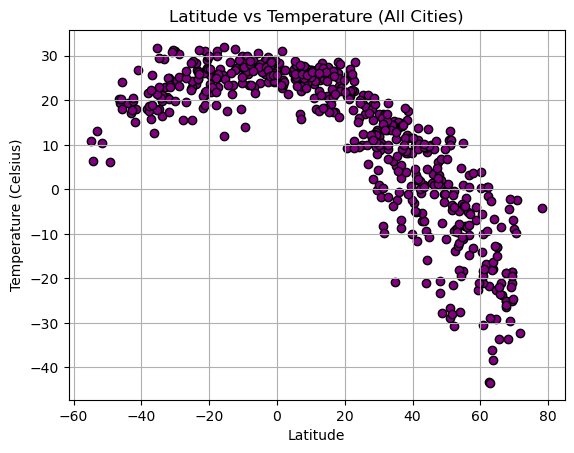

In [10]:
# Build scatter plot for latitude vs. temperature

# Define the x and y axes and values.
lat_v_temp_x = city_data_df["Lat"]
lat_v_temp_y = city_data_df["Max Temp"]

# Incorporate the other graph properties
# Axes labels, put grid in background, purple dots
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs Temperature (All Cities)")
plt.grid(True)
plt.scatter(lat_v_temp_x,lat_v_temp_y, color = "purple", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig1_LatTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

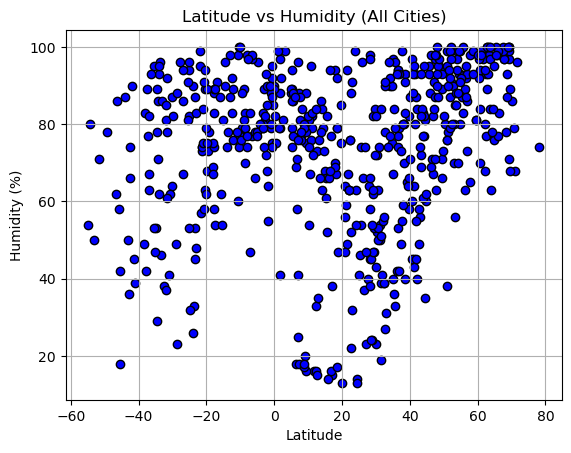

In [11]:
# Build the scatter plots for latitude vs. humidity

# Define x and y axes and values.
lat_v_hum_x = city_data_df["Lat"]
lat_v_hum_y = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (All Cities)")
plt.scatter(lat_v_hum_x,lat_v_hum_y,color="blue", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig2_LatHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

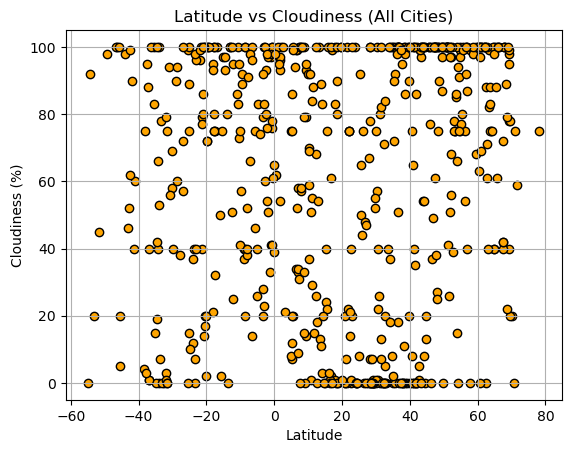

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# Define x and y axes and values.
lat_v_cloud_x = city_data_df["Lat"]
lat_v_cloud_y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat_v_cloud_x,lat_v_cloud_y,color="orange", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig3_LatCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

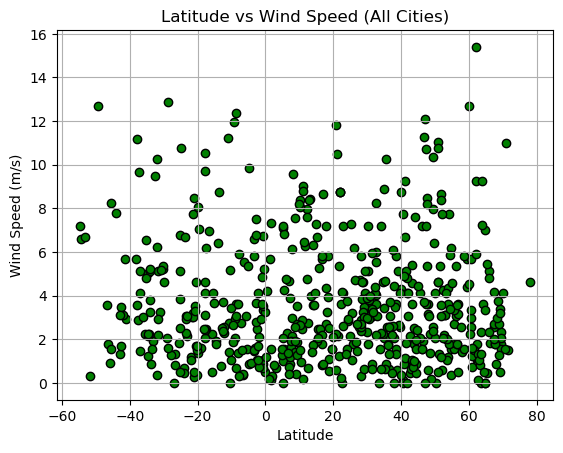

In [13]:
# Build the scatter plots for latitude vs. wind speed

# Define the x and y axes and values.
lat_v_wind_x = city_data_df["Lat"]
lat_v_wind_y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat_v_wind_x,lat_v_wind_y,color="green", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig4_LatWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values*slope + intercept

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi_df)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rumoi,43.9344,141.6428,-9.36,83,54,2.50,JP,1707177065
1,zhigalovo,54.8097,105.1578,-18.42,99,99,0.35,RU,1707177065
2,hamilton,39.1834,-84.5333,8.47,65,0,5.14,US,1707176939
4,lampasas,31.2168,-98.2336,16.94,54,0,3.60,US,1707177067
7,lerwick,60.1545,-1.1494,4.00,98,100,12.69,GB,1707177068
...,...,...,...,...,...,...,...,...,...
574,guatire,10.4762,-66.5427,26.44,67,92,0.98,VE,1707177345
575,bontang,0.1333,117.5000,25.68,82,98,1.17,ID,1707177346
576,arteche,12.2645,125.4048,26.16,84,100,4.76,PH,1707177346


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df=pd.DataFrame(southern_hemi_df)

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hithadhoo,-0.6000,73.0833,28.35,75,100,3.35,MV,1707177066
5,maxixe,-23.8597,35.3472,23.72,90,12,0.68,MZ,1707177067
6,puerto ayora,-0.7393,-90.3518,25.86,95,76,0.89,EC,1707177068
9,invercargill,-46.4000,168.3500,19.45,86,100,1.79,NZ,1707177011
13,port-aux-francais,-49.3500,70.2167,6.11,78,98,12.71,TF,1707177072
...,...,...,...,...,...,...,...,...,...
569,pangai,-19.8000,-174.3500,27.14,75,72,8.07,TO,1707177343
572,menongue,-14.6585,17.6910,17.62,96,93,1.78,AO,1707177344
578,coyhaique,-45.5752,-72.0662,17.97,42,20,1.54,CL,1707177347


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0       0.357559
1      -7.758832
2       3.903298
4       9.848885
7     -11.747732
         ...    
574    25.327889
575    33.046942
576    23.993256
577    23.501509
579   -18.279101
Name: Lat, Length: 401, dtype: float64
y = -0.75x + 33.15
The r-value is: 0.7500741997871934


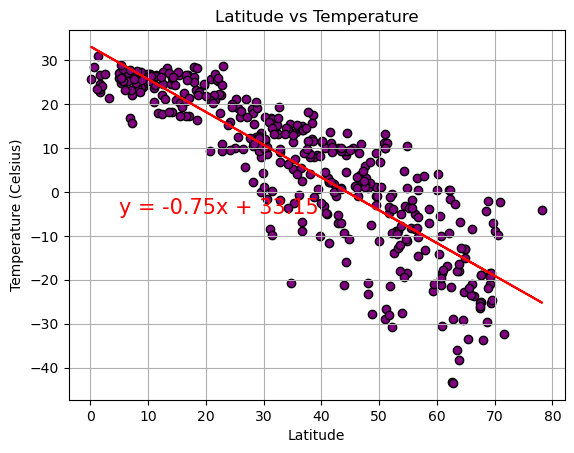

In [17]:
# Linear regression on Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Max Temp"]

# Linear regression on Lat vs Temp
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs temp, with the linear regression
plt.scatter(x_values, y_values_temp, color="purple", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.title("Latitude vs Temperature")
plt.annotate(line_eq,(5,-5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
3      28.098026
5      23.395088
6      28.069861
9      18.837608
13     18.241140
         ...    
569    24.215929
572    25.255502
578    19.004376
580    20.773197
581    26.659710
Name: Lat, Length: 181, dtype: float64
y = 0.2x + 28.22
The r-value is: 0.3327777308215316


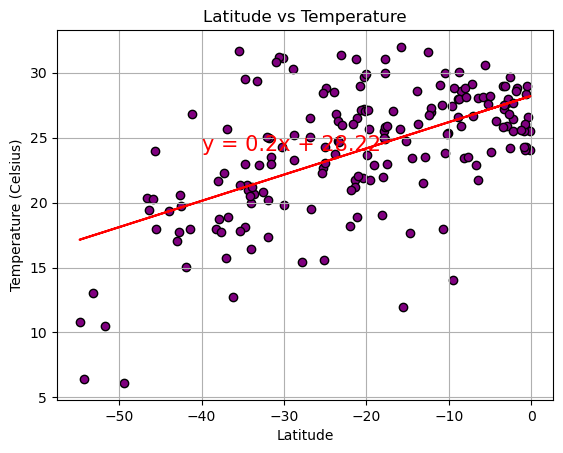

In [18]:
# Linear regression on Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Max Temp"]

# Linear regression on Lat vs Temp
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs temp, with the linear regression
plt.scatter(x_values, y_values_temp, color="purple", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.title("Latitude vs Temperature")
plt.annotate(line_eq,(-40,24),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      76.903222
1      81.714856
2      74.801204
4      71.276486
7      84.079593
         ...    
574    62.100080
575    57.523999
576    62.891290
577    63.182811
579    87.951579
Name: Lat, Length: 401, dtype: float64
y = 0.44x + 57.47
The r-value is: 0.15077607021031741


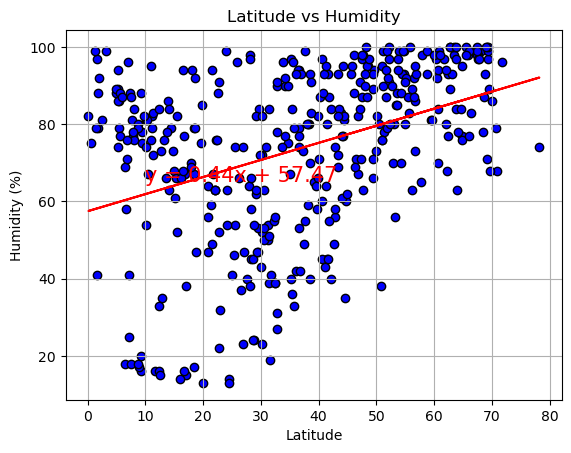

In [19]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Humidity"]

# Linear regression on Lat vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs humidity, with the linear regression
plt.scatter(x_values, y_values_temp, color="blue", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(10,65),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
3      84.015812
5      73.310924
6      83.951701
9      62.937127
13     61.579439
         ...    
569    75.179333
572    77.545622
578    63.316728
580    67.342940
581    80.741896
Name: Lat, Length: 181, dtype: float64
y = 0.46x + 84.29
The r-value is: 0.13050118533334773


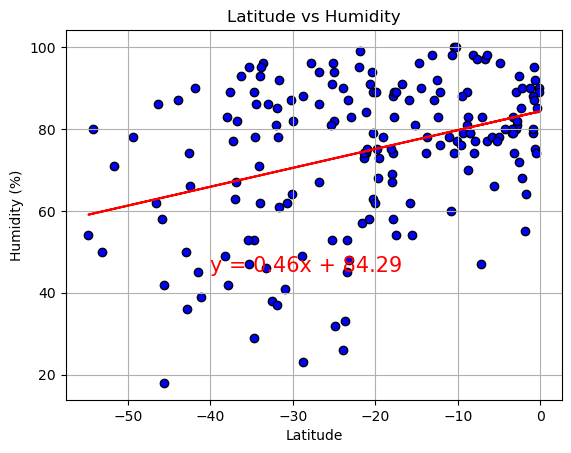

In [20]:
# Southern Hemisphere
# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Humidity"]

# Linear regression on Lat vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs humidity, with the linear regression
plt.scatter(x_values, y_values_temp, color="blue", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      62.768831
1      68.343349
2      60.333538
4      56.249977
7      71.083014
         ...    
574    45.618652
575    40.317034
576    46.535308
577    46.873050
579    75.568904
Name: Lat, Length: 401, dtype: float64
y = 0.51x + 40.25
The r-value is: 0.06240790198890837


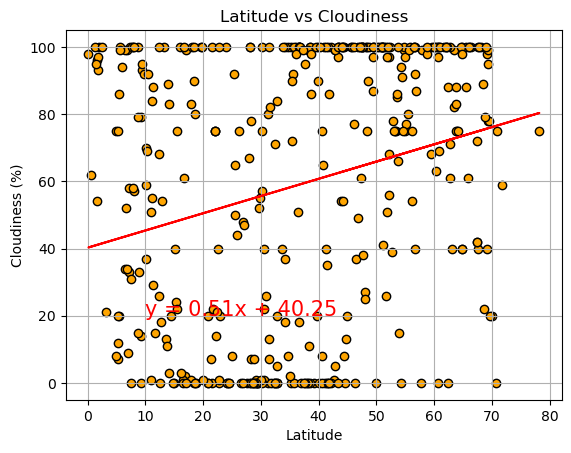

In [21]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Cloudiness"]

# Linear regression on Lat vs Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs cloudiness, with the linear regression
plt.scatter(x_values, y_values_temp, color="orange", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
3      71.358438
5      60.730287
6      71.294788
9      50.430854
13     49.082899
         ...    
569    62.585303
572    64.934630
578    50.807734
580    54.805085
581    68.107992
Name: Lat, Length: 181, dtype: float64
y = 0.46x + 71.63
The r-value is: 0.03430850592396629


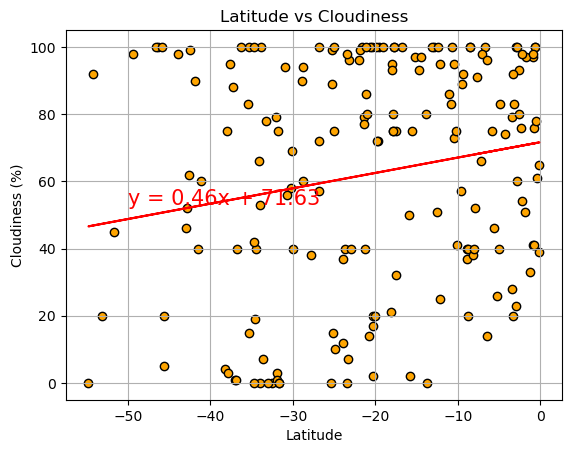

In [22]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Cloudiness"]

# Linear regression on Lat vs Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs cloudiness, with the linear regression
plt.scatter(x_values, y_values_temp, color="orange", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(-50,53),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      3.470153
1      3.449063
2      3.479367
4      3.494816
7      3.438699
         ...   
574    3.535037
575    3.555095
576    3.531569
577    3.530292
579    3.421727
Name: Lat, Length: 401, dtype: float64
y = -0.0x + 3.56
The r-value is: 0.0001949229356139993


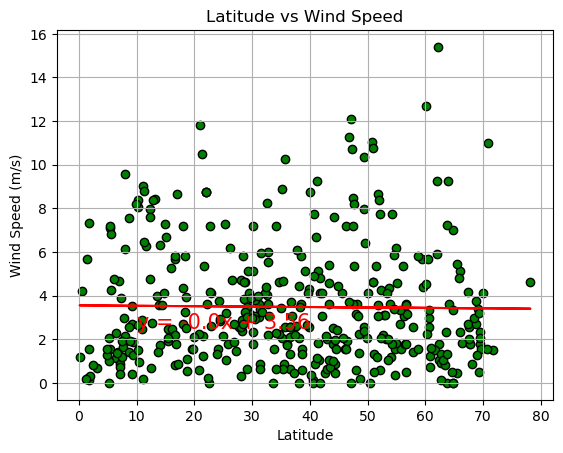

In [23]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Wind Speed"]

# Linear regression on Lat vs Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs wind speed, with the linear regression
plt.scatter(x_values, y_values_temp, color="green", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.annotate(line_eq,(10,2.5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
3      3.065173
5      3.782842
6      3.069471
9      4.478313
13     4.569334
         ...   
569    3.657581
572    3.498943
578    4.452865
580    4.182942
581    3.284661
Name: Lat, Length: 181, dtype: float64
y = -0.03x + 3.05
The r-value is: 0.02234776849415901


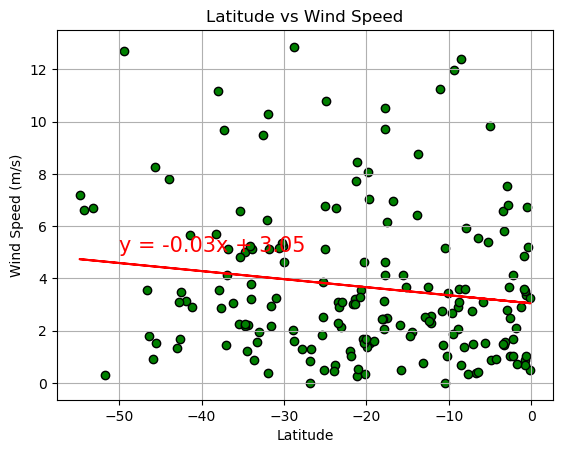

In [24]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Wind Speed"]

# Linear regression on Lat vs Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs wind speed, with the linear regression
plt.scatter(x_values, y_values_temp, color="green", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE